In [3]:
!pip install tqdm


In [59]:
import glob
import cv2
import torch
import random
import numpy as np 
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
random.seed(0)

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [61]:
trainImage = "../../mnist-digit/train/trainingSet/"
def prepare_data(path, mode):
    file_list = glob.glob(path + "*")
    data = []
    for class_path in file_list:
        class_name = class_path.split("\\")[-1]
        for img_path in glob.glob(class_path + "/*.jpg"):
            data.append([img_path, class_name])
    return data
#     else:
#         for class_path in file_list:
#             data.append(class_path)
#         return data
        
my_data = prepare_data(trainImage, mode='train')
random.shuffle(my_data)


In [62]:
my_data_train = my_data[:40000]
my_data_test = my_data[40000:]

In [63]:
my_data_train

[['../../mnist-digit/train/trainingSet\\1\\img_5769.jpg', '1'],
 ['../../mnist-digit/train/trainingSet\\0\\img_1618.jpg', '0'],
 ['../../mnist-digit/train/trainingSet\\6\\img_3064.jpg', '6'],
 ['../../mnist-digit/train/trainingSet\\2\\img_35298.jpg', '2'],
 ['../../mnist-digit/train/trainingSet\\5\\img_33977.jpg', '5'],
 ['../../mnist-digit/train/trainingSet\\2\\img_12414.jpg', '2'],
 ['../../mnist-digit/train/trainingSet\\8\\img_18764.jpg', '8'],
 ['../../mnist-digit/train/trainingSet\\8\\img_31610.jpg', '8'],
 ['../../mnist-digit/train/trainingSet\\6\\img_18467.jpg', '6'],
 ['../../mnist-digit/train/trainingSet\\0\\img_7996.jpg', '0'],
 ['../../mnist-digit/train/trainingSet\\6\\img_18974.jpg', '6'],
 ['../../mnist-digit/train/trainingSet\\1\\img_20347.jpg', '1'],
 ['../../mnist-digit/train/trainingSet\\1\\img_25649.jpg', '1'],
 ['../../mnist-digit/train/trainingSet\\1\\img_27840.jpg', '1'],
 ['../../mnist-digit/train/trainingSet\\3\\img_11319.jpg', '3'],
 ['../../mnist-digit/train/tr

In [64]:
def sigmoid(x):
    return 1. / (1. + torch.exp(-x))

def softmax(x):
    e_x = torch.exp(x - torch.max(x))
    return e_x / e_x.sum(axis= 1)

#LOss function for multi class classification
def generateArray(index):
    temp = np.zeros(10).astype('float32')
    temp[index] = 1
    return temp

def catCrossEntropy(y_true, y_pred):
#     y_true_arr = generateArray(y_true) 
    loss = torch.sum(convert_tensor(y_true) * torch.log(y_pred))
    return loss

# print(catCrossEntropy(8, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.15, 0.05]))
#Return accuracy 
def accuracy(actual, pred, length):
    allTrue = 0
    pred_arr = generateArray(pred)
    actual_arr = generateArray(actual)
#     if np.all(np.array(pred_arr)==np.array(actual_arr)):
    if np.all(pred_arr==actual_arr):
        allTrue +=1
    return allTrue/length

In [65]:
def preprocess(data_array):
#     data_arrays = np.array(data_array)
    img_path, class_name = data_array
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_out = img[:,:,0]/255.0
    return (np.array(img_out).reshape(1,784)).astype('float32'), int(class_name)
#     return img_out
# print(preprocess(my_data[0]))

In [66]:
# Parameter sharing 
# Dataset Augmentation 
# Sparse Representation 

# Optimization vs learning
# Regularization L1 and l2

# OPtimization Algorithm
# - Gradient Clipping
# - Momentum
# - Adam || AdamGrad

## Four Hidden Layer

In [151]:
num_features = 784
HiddenLayer_1 = 392
HiddenLayer_2 = 196
HiddenLayer_3 = 98
HiddenLayer_4 = 49
HiddenLayer_5 = 10
def weight_initialize3(mode):
    
    if mode=="random":
        w1 = np.random.random((HiddenLayer_1,   num_features))
        w2 = np.random.random((HiddenLayer_2, HiddenLayer_1))
        w3 = np.random.random((HiddenLayer_3, HiddenLayer_2))
        w4 = np.random.random((HiddenLayer_4, HiddenLayer_3))
        w5 = np.random.random((HiddenLayer_5, HiddenLayer_4))
        b1 = np.random.random((1, HiddenLayer_1))
        b2 =  np.random.random((1, HiddenLayer_2))
        b3 =  np.random.random((1, HiddenLayer_3))
        b4 =  np.random.random((1, HiddenLayer_4))
        b5 =  np.random.random((1, HiddenLayer_5))
        
    elif mode=="xavierNormal":
        w1 = np.random.normal(loc=0.0, scale = np.sqrt(2/(HiddenLayer_1+num_features)), size = (HiddenLayer_1,num_features)).astype(np.float32)
        w2 = np.random.normal(loc=0.0, scale = np.sqrt(2/(HiddenLayer_1+HiddenLayer_2)), size = (HiddenLayer_2, HiddenLayer_1)).astype(np.float32)
        w3 = np.random.normal(loc=0.0, scale = np.sqrt(2/(HiddenLayer_2+HiddenLayer_3)), size = (HiddenLayer_3, HiddenLayer_2)).astype(np.float32)
        w4 = np.random.normal(loc=0.0, scale = np.sqrt(2/(HiddenLayer_4+HiddenLayer_3)), size = (HiddenLayer_4, HiddenLayer_3)).astype(np.float32)
        w5 = np.random.normal(loc=0.0, scale = np.sqrt(2/(HiddenLayer_4+HiddenLayer_5)), size = (HiddenLayer_5, HiddenLayer_4)).astype(np.float32)
        
        b1 = np.random.normal(loc=0.0, scale = np.sqrt(2/(1+HiddenLayer_1)), size = (1,HiddenLayer_1)).astype(np.float32)
        b2 = np.random.normal(loc=0.0, scale = np.sqrt(2/(1+HiddenLayer_2)), size = (1,HiddenLayer_2)).astype(np.float32)
        b3 = np.random.normal(loc=0.0, scale = np.sqrt(2/(1+HiddenLayer_3)), size = (1,HiddenLayer_3)).astype(np.float32)
        b4 = np.random.normal(loc=0.0, scale = np.sqrt(2/(1+HiddenLayer_4)), size = (1,HiddenLayer_4)).astype(np.float32)
        b5 = np.random.normal(loc=0.0, scale = np.sqrt(2/(1+HiddenLayer_5)), size = (1,HiddenLayer_5)).astype(np.float32)
        
#         Aw1 = np.full(shape=(HiddenLayer_1,   num_features), fill_value=0, dtype=np.float64)
#         Aw2 = np.full(shape=(HiddenLayer_2, HiddenLayer_1), fill_value=0, dtype=np.float64)
#         Aw3 = np.full(shape=(HiddenLayer_3, HiddenLayer_2), fill_value=0, dtype=np.float64)
#         Aw4 = np.full(shape=(HiddenLayer_4, HiddenLayer_3), fill_value=0, dtype=np.float64)
#         Aw5 = np.full(shape=(HiddenLayer_5, HiddenLayer_4), fill_value=0, dtype=np.float64)
#         Ab1 = np.full(shape=(1, HiddenLayer_1), fill_value=0, dtype=np.float64)
#         Ab2 = np.full(shape=(1, HiddenLayer_2), fill_value=0, dtype=np.float64)
#         Ab3 = np.full(shape=(1, HiddenLayer_3), fill_value=0, dtype=np.float64)
#         Ab4 = np.full(shape=(1, HiddenLayer_4), fill_value=0, dtype=np.float64)
#         Ab5 = np.full(shape=(1, HiddenLayer_5), fill_value=0, dtype=np.float64)
        
    return w1, w2, w3, w4, w5, b1, b2, b3, b4, b5
# , Aw1, Aw2, Aw3, Aw4, Aw5, Ab1, Ab2, Ab3, Ab4, Ab5

In [152]:
def convert_tensor(x):
    x = torch.from_numpy(x)
    return x.to(device)

### Optimizer
#### Mini-batch Gradient Descent with AdaptiveGradient(AdaGrad)

<div>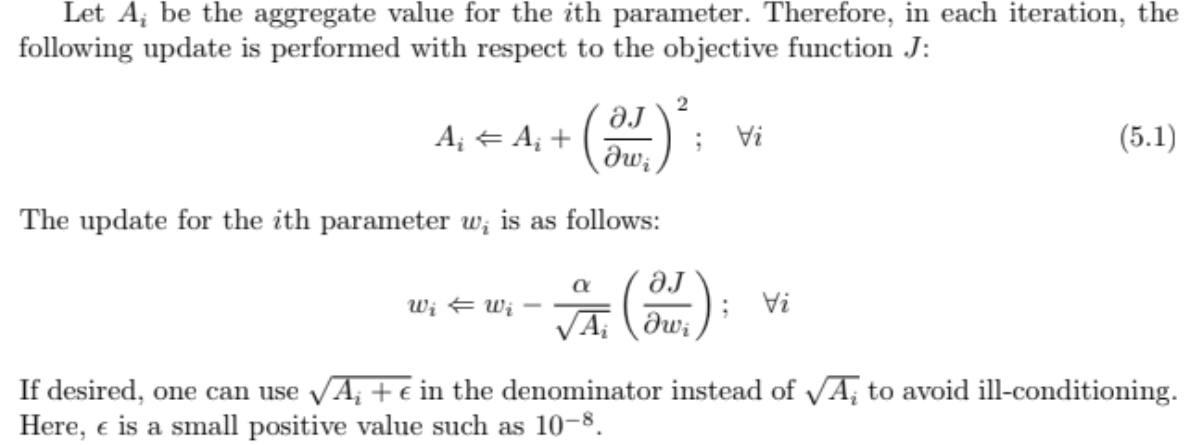</div>

Here mini-batch gradient descent is used, so the weight is updated in each batch rather than in each data points.  
Average gradient is calculated of each gradients in batch.

In [153]:
#creating mask for zeroing out nodes in hidden layer
def create_mask(hl_size, prob):
    '''
        inputs: Hidden Layer size-single value , Proabability of making zero nodes[0-1]
    '''
    mask = np.full(shape=(1, hl_size), fill_value=1, dtype=np.float32)
    num_node = int(prob*hl_size)
    random_list = random.sample(range(0, hl_size), num_node)
    for i in random_list:
        mask[0][i] = 0
    return convert_tensor(mask)
print(create_mask(10, 0.3))

tensor([[1., 1., 1., 0., 1., 0., 1., 1., 1., 0.]], device='cuda:0')


In [154]:
from tqdm import trange
# iterations = 20
# for i in trange(iterations, desc="Proving P=NP", unit="carrots"):

In [159]:
lossArray = []
accArray = []

def forward3(arr,  weight1, weight2, weight3, weight4, weight5, bias1, bias2, bias3, bias4, bias5, epsilon=10e-8, batch_size=400, learningRate=0.01, epochs=100):
    w1_grad = []
    w2_grad = []
    w3_grad = []
    w4_grad = []
    w5_grad = []
    b1_grad = []
    b2_grad = []
    b3_grad = []
    b4_grad = []
    b5_grad = []
    for epoch in (range(epochs)):
        acc = 0
        loss = 0
        Aw1 = convert_tensor(np.full(shape=(HiddenLayer_1, num_features), fill_value=0, dtype=np.float32))
        Aw2 = convert_tensor(np.full(shape=(HiddenLayer_2, HiddenLayer_1), fill_value=0, dtype=np.float32))
        Aw3 = convert_tensor(np.full(shape=(HiddenLayer_3, HiddenLayer_2), fill_value=0, dtype=np.float32))
        Aw4 = convert_tensor(np.full(shape=(HiddenLayer_4, HiddenLayer_3), fill_value=0, dtype=np.float32))
        Aw5 = convert_tensor(np.full(shape=(HiddenLayer_5, HiddenLayer_4), fill_value=0, dtype=np.float32))
        Ab1 = convert_tensor(np.full(shape=(1, HiddenLayer_1), fill_value=0, dtype=np.float32))
        Ab2 = convert_tensor(np.full(shape=(1, HiddenLayer_2), fill_value=0, dtype=np.float32))
        Ab3 = convert_tensor(np.full(shape=(1, HiddenLayer_3), fill_value=0, dtype=np.float32))
        Ab4 = convert_tensor(np.full(shape=(1, HiddenLayer_4), fill_value=0, dtype=np.float32))
        Ab5 = convert_tensor(np.full(shape=(1, HiddenLayer_5), fill_value=0, dtype=np.float32))
        print(f"Epoch: {epoch+1}")
        for index in tqdm_notebook(range(len(arr))):
            inter_mask1 = create_mask(392, 0.4)
            
            inter_mask3 = create_mask(98, 0.2)
            inputs, output = preprocess(arr[index])
            
            intermediate1 = torch.matmul(convert_tensor(inputs), weight1.T) + bias1
            hiddenOutput1 = sigmoid(intermediate1)* inter_mask1
            hiddenOutput1 = hiddenOutput1.to(device)
            
            intermediate2 = torch.matmul(hiddenOutput1, weight2.T) + bias2
            hiddenOutput2 = sigmoid(intermediate2) 
            hiddenOutput2 = hiddenOutput2.to(device)
            
            intermediate3 = torch.matmul(hiddenOutput2, weight3.T) + bias3
            hiddenOutput3 = sigmoid(intermediate3) * inter_mask3
            hiddenOutput3 = hiddenOutput3.to(device)
            
            intermediate4 = torch.matmul(hiddenOutput3, weight4.T) + bias4
            hiddenOutput4 = sigmoid(intermediate4) 
            hiddenOutput4 = hiddenOutput4.to(device)
            
            intermediate5 = torch.matmul(hiddenOutput4, weight5.T) + bias5
            output_pred = softmax(intermediate5) 
            check = torch.argmax(output_pred)
            output_pred = output_pred.to(device)
            output_arr = generateArray(output)
            acc = acc + accuracy(output, check, len(arr))
            output_pred = output_pred.to(device)
            loss = loss - catCrossEntropy(generateArray(output), output_pred)
            
            db5 = (output_pred - convert_tensor(output_arr))
            dw5 = torch.matmul(db5.T, hiddenOutput4)
        
            db4_4 = torch.matmul(torch.matmul(db5, weight5).T, hiddenOutput4)
            db4 = torch.matmul(db4_4, (1-hiddenOutput4).T).T
            dw4 = torch.matmul(db4.T, hiddenOutput3)
            
            db3_3 = torch.matmul(torch.matmul(db4, weight4).T, hiddenOutput3)
            db3 = torch.matmul(db3_3, (1-hiddenOutput3).T).T
            dw3 = torch.matmul(db3.T, hiddenOutput2)
            
            db2_2 = torch.matmul(torch.matmul(db3, weight3).T, hiddenOutput2)
            db2 = torch.matmul(db2_2, (1-hiddenOutput2).T).T
            dw2 = torch.matmul(db2.T, hiddenOutput1)
            
            db1_1 = torch.matmul(torch.matmul(db2, weight2).T, hiddenOutput1)
            db1 = torch.matmul(db1_1, (1-hiddenOutput1).T).T
            dw1 = torch.matmul(db1.T, convert_tensor(inputs))
            
            w1_grad.append(dw1)
            w2_grad.append(dw2)
            w3_grad.append(dw3)
            w4_grad.append(dw4)
            w5_grad.append(dw5)
            b1_grad.append(db1)
            b2_grad.append(db2)
            b3_grad.append(db3)
            b4_grad.append(db4)
            b5_grad.append(db5)
#             print(len(w1_grad))
            if (index+1) % batch_size == 0:
                vw1 = (sum(w1_grad)/batch_size)
                vb1 = (sum(b1_grad)/batch_size)
                Aw1 += vw1**2
                Ab1 += vb1**2 
                
                weight1 = weight1 - (learningRate/torch.sqrt(Aw1.to(device)+epsilon)) * vw1
                bias1 = bias1 - (learningRate/torch.sqrt(Ab1.to(device)+epsilon)) * vb1
                
                vw2 = (sum(w2_grad)/batch_size)
                vb2 = (sum(b2_grad)/batch_size)
                Aw2 += vw2**2
                Ab2 += vb2**2
                weight2 = weight2 - (learningRate/torch.sqrt(Aw2.to(device)+epsilon)) * vw2
                bias2 = bias2 - (learningRate/torch.sqrt(Ab2.to(device)+epsilon)) * vb2
                
                vw3 = (sum(w3_grad)/batch_size)
                vb3 = (sum(b3_grad)/batch_size)
                Aw3 += vw3**2
                Ab3 += vb3**2
                weight3 = weight3 - (learningRate/torch.sqrt(Aw3.to(device)+epsilon)) * vw3
                bias3 = bias3 - (learningRate/torch.sqrt(Ab3.to(device)+epsilon)) * vb3
                
                vw4 = (sum(w4_grad)/batch_size)
                vb4 = (sum(b4_grad)/batch_size)
                Aw4 += vw4**2
                Ab4 += vb4**2
                weight4 = weight4 - (learningRate/torch.sqrt(Aw4.to(device)+epsilon)) * vw4
                bias4 = bias4 - (learningRate/torch.sqrt(Ab4.to(device)+epsilon)) * vb4
                
                vw5 = (sum(w5_grad)/batch_size)
                vb5 = (sum(b5_grad)/batch_size)
                Aw5 += vw5**2
                Ab5 += vb5**2
                weight5 = weight5 - (learningRate/torch.sqrt(Aw5.to(device)+epsilon)) * vw5
                bias5 = bias5 - (learningRate/torch.sqrt(Ab5.to(device)+epsilon)) * vb5
                
                w1_grad,w2_grad, w3_grad, w4_grad, w5_grad, b1_grad, b2_grad, b3_grad, b4_grad, b5_grad=[], [],[],[],[],[], [], [],[],[]
        lossArray.append(loss)
        accArray.append(acc)
        print(f"Accuracy: {acc} and Loss: {loss}")
        print('-------------------------------------------------------------')
    print('Completed!')
    return weight1, weight2, weight3, weight4, weight5, bias1, bias2, bias3, bias4, bias5

In [160]:
weight1, weight2, weight3, weight4, weight5, bias1, bias2, bias3, bias4, bias5 = weight_initialize3(mode="xavierNormal")


w1, w2, w3, w4, w5, b1, b2, b3, b4, b5= forward3(my_data_train, convert_tensor(weight1), convert_tensor(weight2), convert_tensor(weight3), convert_tensor(weight4), convert_tensor(weight5), convert_tensor(bias1), convert_tensor(bias2), convert_tensor(bias3), convert_tensor(bias4), convert_tensor(bias5), epsilon=10e-8, batch_size=200, learningRate=0.01, epochs=50)

Epoch: 1


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.4257499999999572 and Loss: 62409.12890625
-------------------------------------------------------------
Epoch: 2


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.5640500000000842 and Loss: 47951.80078125
-------------------------------------------------------------
Epoch: 3


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.6293750000002221 and Loss: 41351.57421875
-------------------------------------------------------------
Epoch: 4


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.669625000000307 and Loss: 37931.125
-------------------------------------------------------------
Epoch: 5


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.6965500000003638 and Loss: 35956.4453125
-------------------------------------------------------------
Epoch: 6


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7111000000003945 and Loss: 34636.46484375
-------------------------------------------------------------
Epoch: 7


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7451000000004663 and Loss: 31961.6484375
-------------------------------------------------------------
Epoch: 8


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7617750000005015 and Loss: 30129.798828125
-------------------------------------------------------------
Epoch: 9


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7679000000005144 and Loss: 28991.568359375
-------------------------------------------------------------
Epoch: 10


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7699500000005187 and Loss: 28258.34375
-------------------------------------------------------------
Epoch: 11


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.771500000000522 and Loss: 27667.4296875
-------------------------------------------------------------
Epoch: 12


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.776725000000533 and Loss: 27077.07421875
-------------------------------------------------------------
Epoch: 13


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7783750000005365 and Loss: 26626.904296875
-------------------------------------------------------------
Epoch: 14


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7874750000005557 and Loss: 25835.890625
-------------------------------------------------------------
Epoch: 15


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.7983500000005787 and Loss: 25383.0703125
-------------------------------------------------------------
Epoch: 16


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8104500000006042 and Loss: 24384.875
-------------------------------------------------------------
Epoch: 17


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8159000000006157 and Loss: 23866.916015625
-------------------------------------------------------------
Epoch: 18


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8207250000006259 and Loss: 23337.55859375
-------------------------------------------------------------
Epoch: 19


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8279250000006411 and Loss: 22472.810546875
-------------------------------------------------------------
Epoch: 20


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8341500000006542 and Loss: 21736.294921875
-------------------------------------------------------------
Epoch: 21


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8373000000006608 and Loss: 21265.826171875
-------------------------------------------------------------
Epoch: 22


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8401500000006669 and Loss: 20790.220703125
-------------------------------------------------------------
Epoch: 23


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8398000000006661 and Loss: 20532.869140625
-------------------------------------------------------------
Epoch: 24


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8449000000006769 and Loss: 19956.744140625
-------------------------------------------------------------
Epoch: 25


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8486250000006847 and Loss: 19633.029296875
-------------------------------------------------------------
Epoch: 26


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.853475000000695 and Loss: 19239.69921875
-------------------------------------------------------------
Epoch: 27


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8555500000006994 and Loss: 18949.787109375
-------------------------------------------------------------
Epoch: 28


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8588750000007064 and Loss: 18440.94921875
-------------------------------------------------------------
Epoch: 29


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8607750000007104 and Loss: 18093.9453125
-------------------------------------------------------------
Epoch: 30


  0%|          | 0/40000 [00:00<?, ?it/s]

Accuracy: 0.8633000000007157 and Loss: 17834.10546875
-------------------------------------------------------------
Epoch: 31


  0%|          | 0/40000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [161]:
def test3(data_path, weight1, weight2, weight3, weight4, weight5, bias1, bias2, bias3, bias4, bias5):
    acc = 0
    for idx, item in enumerate(data_path):
        inputs, output = preprocess(item)
        intermediate1 = torch.matmul(convert_tensor(inputs), weight1.T) + bias1
        hiddenOutput1 = sigmoid(intermediate1)
        hiddenOutput1 = hiddenOutput1.to(device)
        intermediate2 = torch.matmul(hiddenOutput1, weight2.T) + bias2
        hiddenOutput2 = sigmoid(intermediate2) 
        hiddenOutput2 = hiddenOutput2.to(device)
        intermediate3 = torch.matmul(hiddenOutput2, weight3.T) + bias3
        hiddenOutput3 = sigmoid(intermediate3) 
        hiddenOutput3 = hiddenOutput3.to(device)
        intermediate4 = torch.matmul(hiddenOutput3, weight4.T) + bias4
        hiddenOutput4 = sigmoid(intermediate4) 
        hiddenOutput4 = hiddenOutput4.to(device)
        intermediate5 = torch.matmul(hiddenOutput4, weight5.T) + bias5
        output_pred = softmax(intermediate5)
        output_pred = output_pred.to(device)
        check = torch.argmax(output_pred)
        acc+=accuracy(int(output), check, len(data_path))
        print(f'Test: {idx+1}')
        print(f'Actual: {output}')
        print(f'Predicted: {check}')
#         plt.matshow(inputs)
#         plt.pause(0.01)
        print(f'-------------------------------------------')
    print(f"Test Accuracy: {acc}")

In [163]:
test3(my_data_test, w1, w2, w3, w4, w5, b1, b2, b3, b4, b5)

Test: 1
Actual: 8
Predicted: 3
-------------------------------------------
Test: 2
Actual: 9
Predicted: 9
-------------------------------------------
Test: 3
Actual: 5
Predicted: 5
-------------------------------------------
Test: 4
Actual: 3
Predicted: 3
-------------------------------------------
Test: 5
Actual: 6
Predicted: 6
-------------------------------------------
Test: 6
Actual: 1
Predicted: 1
-------------------------------------------
Test: 7
Actual: 5
Predicted: 3
-------------------------------------------
Test: 8
Actual: 8
Predicted: 3
-------------------------------------------
Test: 9
Actual: 7
Predicted: 9
-------------------------------------------
Test: 10
Actual: 2
Predicted: 2
-------------------------------------------
Test: 11
Actual: 7
Predicted: 7
-------------------------------------------
Test: 12
Actual: 6
Predicted: 6
-------------------------------------------
Test: 13
Actual: 7
Predicted: 7
-------------------------------------------
Test: 14
Actual: 1
Pr

Predicted: 2
-------------------------------------------
Test: 181
Actual: 0
Predicted: 0
-------------------------------------------
Test: 182
Actual: 2
Predicted: 2
-------------------------------------------
Test: 183
Actual: 1
Predicted: 1
-------------------------------------------
Test: 184
Actual: 5
Predicted: 5
-------------------------------------------
Test: 185
Actual: 2
Predicted: 2
-------------------------------------------
Test: 186
Actual: 4
Predicted: 4
-------------------------------------------
Test: 187
Actual: 1
Predicted: 1
-------------------------------------------
Test: 188
Actual: 9
Predicted: 9
-------------------------------------------
Test: 189
Actual: 7
Predicted: 7
-------------------------------------------
Test: 190
Actual: 4
Predicted: 4
-------------------------------------------
Test: 191
Actual: 1
Predicted: 1
-------------------------------------------
Test: 192
Actual: 8
Predicted: 3
-------------------------------------------
Test: 193
Actual: 6

Test: 371
Actual: 0
Predicted: 0
-------------------------------------------
Test: 372
Actual: 6
Predicted: 6
-------------------------------------------
Test: 373
Actual: 2
Predicted: 2
-------------------------------------------
Test: 374
Actual: 0
Predicted: 0
-------------------------------------------
Test: 375
Actual: 8
Predicted: 3
-------------------------------------------
Test: 376
Actual: 1
Predicted: 1
-------------------------------------------
Test: 377
Actual: 6
Predicted: 6
-------------------------------------------
Test: 378
Actual: 4
Predicted: 4
-------------------------------------------
Test: 379
Actual: 9
Predicted: 9
-------------------------------------------
Test: 380
Actual: 0
Predicted: 0
-------------------------------------------
Test: 381
Actual: 4
Predicted: 4
-------------------------------------------
Test: 382
Actual: 3
Predicted: 3
-------------------------------------------
Test: 383
Actual: 7
Predicted: 7
-------------------------------------------

Test: 543
Actual: 5
Predicted: 5
-------------------------------------------
Test: 544
Actual: 7
Predicted: 7
-------------------------------------------
Test: 545
Actual: 5
Predicted: 3
-------------------------------------------
Test: 546
Actual: 5
Predicted: 5
-------------------------------------------
Test: 547
Actual: 7
Predicted: 7
-------------------------------------------
Test: 548
Actual: 8
Predicted: 5
-------------------------------------------
Test: 549
Actual: 5
Predicted: 8
-------------------------------------------
Test: 550
Actual: 9
Predicted: 7
-------------------------------------------
Test: 551
Actual: 6
Predicted: 6
-------------------------------------------
Test: 552
Actual: 1
Predicted: 1
-------------------------------------------
Test: 553
Actual: 1
Predicted: 1
-------------------------------------------
Test: 554
Actual: 0
Predicted: 0
-------------------------------------------
Test: 555
Actual: 5
Predicted: 5
-------------------------------------------

Predicted: 2
-------------------------------------------
Test: 727
Actual: 8
Predicted: 5
-------------------------------------------
Test: 728
Actual: 2
Predicted: 1
-------------------------------------------
Test: 729
Actual: 4
Predicted: 9
-------------------------------------------
Test: 730
Actual: 6
Predicted: 6
-------------------------------------------
Test: 731
Actual: 8
Predicted: 5
-------------------------------------------
Test: 732
Actual: 1
Predicted: 1
-------------------------------------------
Test: 733
Actual: 2
Predicted: 2
-------------------------------------------
Test: 734
Actual: 9
Predicted: 7
-------------------------------------------
Test: 735
Actual: 3
Predicted: 3
-------------------------------------------
Test: 736
Actual: 7
Predicted: 7
-------------------------------------------
Test: 737
Actual: 0
Predicted: 0
-------------------------------------------
Test: 738
Actual: 5
Predicted: 8
-------------------------------------------
Test: 739
Actual: 1

Predicted: 7
-------------------------------------------
Test: 924
Actual: 8
Predicted: 8
-------------------------------------------
Test: 925
Actual: 0
Predicted: 0
-------------------------------------------
Test: 926
Actual: 9
Predicted: 9
-------------------------------------------
Test: 927
Actual: 1
Predicted: 1
-------------------------------------------
Test: 928
Actual: 7
Predicted: 9
-------------------------------------------
Test: 929
Actual: 1
Predicted: 1
-------------------------------------------
Test: 930
Actual: 9
Predicted: 9
-------------------------------------------
Test: 931
Actual: 9
Predicted: 9
-------------------------------------------
Test: 932
Actual: 5
Predicted: 5
-------------------------------------------
Test: 933
Actual: 5
Predicted: 0
-------------------------------------------
Test: 934
Actual: 3
Predicted: 3
-------------------------------------------
Test: 935
Actual: 1
Predicted: 1
-------------------------------------------
Test: 936
Actual: 3

Predicted: 9
-------------------------------------------
Test: 1071
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1072
Actual: 9
Predicted: 9
-------------------------------------------
Test: 1073
Actual: 5
Predicted: 5
-------------------------------------------
Test: 1074
Actual: 2
Predicted: 2
-------------------------------------------
Test: 1075
Actual: 7
Predicted: 7
-------------------------------------------
Test: 1076
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1077
Actual: 8
Predicted: 1
-------------------------------------------
Test: 1078
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1079
Actual: 9
Predicted: 9
-------------------------------------------
Test: 1080
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1081
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1082
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1

Test: 1230
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1231
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1232
Actual: 9
Predicted: 9
-------------------------------------------
Test: 1233
Actual: 2
Predicted: 2
-------------------------------------------
Test: 1234
Actual: 4
Predicted: 4
-------------------------------------------
Test: 1235
Actual: 5
Predicted: 5
-------------------------------------------
Test: 1236
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1237
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1238
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1239
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1240
Actual: 9
Predicted: 4
-------------------------------------------
Test: 1241
Actual: 8
Predicted: 9
-------------------------------------------
Test: 1242
Actual: 6
Predicted: 6
------------------------------

Predicted: 3
-------------------------------------------
Test: 1418
Actual: 3
Predicted: 8
-------------------------------------------
Test: 1419
Actual: 8
Predicted: 3
-------------------------------------------
Test: 1420
Actual: 8
Predicted: 3
-------------------------------------------
Test: 1421
Actual: 8
Predicted: 8
-------------------------------------------
Test: 1422
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1423
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1424
Actual: 7
Predicted: 9
-------------------------------------------
Test: 1425
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1426
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1427
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1428
Actual: 9
Predicted: 7
-------------------------------------------
Test: 1429
Actual: 5
Predicted: 5
-------------------------------------------
Test: 1

Predicted: 3
-------------------------------------------
Test: 1583
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1584
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1585
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1586
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1587
Actual: 7
Predicted: 7
-------------------------------------------
Test: 1588
Actual: 9
Predicted: 9
-------------------------------------------
Test: 1589
Actual: 3
Predicted: 0
-------------------------------------------
Test: 1590
Actual: 7
Predicted: 7
-------------------------------------------
Test: 1591
Actual: 8
Predicted: 5
-------------------------------------------
Test: 1592
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1593
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1594
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1

Predicted: 2
-------------------------------------------
Test: 1751
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1752
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1753
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1754
Actual: 2
Predicted: 2
-------------------------------------------
Test: 1755
Actual: 0
Predicted: 5
-------------------------------------------
Test: 1756
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1757
Actual: 8
Predicted: 3
-------------------------------------------
Test: 1758
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1759
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1760
Actual: 6
Predicted: 6
-------------------------------------------
Test: 1761
Actual: 8
Predicted: 3
-------------------------------------------
Test: 1762
Actual: 5
Predicted: 0
-------------------------------------------
Test: 1

Predicted: 1
-------------------------------------------
Test: 1904
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1905
Actual: 2
Predicted: 2
-------------------------------------------
Test: 1906
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1907
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1908
Actual: 1
Predicted: 1
-------------------------------------------
Test: 1909
Actual: 7
Predicted: 7
-------------------------------------------
Test: 1910
Actual: 3
Predicted: 3
-------------------------------------------
Test: 1911
Actual: 9
Predicted: 9
-------------------------------------------
Test: 1912
Actual: 0
Predicted: 0
-------------------------------------------
Test: 1913
Actual: 2
Predicted: 2
-------------------------------------------
Test: 1914
Actual: 2
Predicted: 2
-------------------------------------------
Test: 1915
Actual: 2
Predicted: 3
-------------------------------------------
Test: 1

In [164]:
my_data_test[0][0]

'../../mnist-digit/train/trainingSet\\8\\img_40266.jpg'

In [165]:
torch.argmax

<function _VariableFunctionsClass.argmax>

In [166]:
x = np.random.random((10000,10000))
# .astype=(np.float32)
y = np.random.random((10000,10000))
# .astype=(np.float32)
a = torch.from_numpy(x)
b = torch.from_numpy(y)
# torch.from_numpy(x)
# torch.from_numpy(y)
# a.to(device)
# b.to(device)
# z = torch.mm(a, b)

In [167]:
my_data_test

[['../../mnist-digit/train/trainingSet\\8\\img_40266.jpg', '8'],
 ['../../mnist-digit/train/trainingSet\\9\\img_4578.jpg', '9'],
 ['../../mnist-digit/train/trainingSet\\5\\img_503.jpg', '5'],
 ['../../mnist-digit/train/trainingSet\\3\\img_4277.jpg', '3'],
 ['../../mnist-digit/train/trainingSet\\6\\img_28736.jpg', '6'],
 ['../../mnist-digit/train/trainingSet\\1\\img_6806.jpg', '1'],
 ['../../mnist-digit/train/trainingSet\\5\\img_18423.jpg', '5'],
 ['../../mnist-digit/train/trainingSet\\8\\img_30026.jpg', '8'],
 ['../../mnist-digit/train/trainingSet\\7\\img_13896.jpg', '7'],
 ['../../mnist-digit/train/trainingSet\\2\\img_3620.jpg', '2'],
 ['../../mnist-digit/train/trainingSet\\7\\img_22634.jpg', '7'],
 ['../../mnist-digit/train/trainingSet\\6\\img_9928.jpg', '6'],
 ['../../mnist-digit/train/trainingSet\\7\\img_6624.jpg', '7'],
 ['../../mnist-digit/train/trainingSet\\1\\img_4531.jpg', '1'],
 ['../../mnist-digit/train/trainingSet\\7\\img_25379.jpg', '7'],
 ['../../mnist-digit/train/trainin

#### Test single image

In [1]:
path_img= '../dataset/three2out.png'
# path_img = my_data_test[1][0]
img = cv2.imread(path_img)
plt.matshow(img)

NameError: name 'cv2' is not defined

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_out = (img[:,:,0]/255.0 + 0.11)
inputs = np.array(img_out).reshape(1,784).astype('float32')

In [175]:
intermediate1 = torch.matmul(convert_tensor(inputs), w1.T) + b1
hiddenOutput1 = sigmoid(intermediate1)
hiddenOutput1 = hiddenOutput1.to(device)
intermediate2 = torch.matmul(hiddenOutput1, w2.T) + b2
hiddenOutput2 = sigmoid(intermediate2) 
hiddenOutput2 = hiddenOutput2.to(device)
intermediate3 = torch.matmul(hiddenOutput2, w3.T) + b3
hiddenOutput3 = sigmoid(intermediate3) 
hiddenOutput3 = hiddenOutput3.to(device)
intermediate4 = torch.matmul(hiddenOutput3, w4.T) + b4
hiddenOutput4 = sigmoid(intermediate4) 
hiddenOutput4 = hiddenOutput4.to(device)
intermediate5 = torch.matmul(hiddenOutput4, w5.T) + b5
output_pred = softmax(intermediate5)
output_pred = output_pred.to(device)
check = torch.argmax(output_pred)

In [176]:
output_pred * 100

tensor([[4.6099e-04, 9.2987e+01, 7.9729e-01, 3.7889e+00, 1.0278e-03, 4.9305e-02,
         6.2538e-04, 1.2964e+00, 1.0666e+00, 1.2119e-02]], device='cuda:0')

In [177]:
my_data_test[1]

['../../mnist-digit/train/trainingSet\\9\\img_4578.jpg', '9']

In [178]:
# 1 = 65
# 2 = 1.5
# 3 = 16
# 5 = 1.4
# 7 = 5.59

In [173]:
check

tensor(5, device='cuda:0')